In [88]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from tueplots import \
    bundles  # contains the tue-ai styles for figures in slides and documents
from tueplots.constants.color import rgb  # contains the tue-ai color scheme

plt.rcParams.update({"figure.dpi": 200}) # just to display the plots better here in the notebook

Here's a toy function that makes a plot of functions from a Gaussian process

In [159]:
def make_plot(ax: plt.Axes) -> None:

    # a bit of Gauss-fu
    def kernel(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        return np.exp(-((a[:, None] - b[None, :]) ** 2))

    def Gaussdensity(y: np.ndarray, mu: np.ndarray, sigma: np.ndarray) -> np.ndarray:
        return np.exp(
            -((y[:, None] - mu[None, :]) ** 2) / (2 * sigma[None, :] ** 2)
        ) / np.sqrt(2 * np.pi * sigma[None, :] ** 2)

    b2w = LinearSegmentedColormap.from_list("b2w", ["w", rgb.tue_ai_darkblue], N=1024)

    rng = np.random.default_rng(0)

    PLOTRES = 500
    NDATA = 10
    NSAMPLES = 5
    sigma = 0.2
    x = np.linspace(-5, 5, PLOTRES)
    X = (rng.random(NDATA) - 0.5) * 7

    K = kernel(X, X)
    G = K + sigma**2 * np.eye(NDATA)
    U = rng.normal(0, 1, NDATA)
    Y = U @ np.linalg.cholesky(G).T

    kxx = kernel(x, x)
    kxX = kernel(x, X)

    alpha = np.linalg.solve(G, kxX.T)
    mpost = alpha.T @ Y
    vpost = kxx - kxX @ alpha
    spost = np.sqrt(np.diag(vpost))
    u = rng.normal(0,1, (NSAMPLES, PLOTRES))
    samples = (
        u @ np.linalg.cholesky(vpost + 1e-6 * np.eye(PLOTRES)).T + mpost[None, :]
    )

    # plot begins here

    # shading
    YY = np.linspace(-4, 4, 500)
    P = Gaussdensity(YY, mpost, spost) ** (1 / 2)
    ax.imshow(
        P,
        extent=[-5, 5, -4, 4],
        aspect="auto",
        cmap=b2w,
        origin="lower",
        label="marginal pdf",
        alpha = P / P.ravel().max()
    )

    # mean
    ax.plot(x, mpost, color=rgb.tue_ai_darkblue, lw=2, label="Posterior mean")
    # std-devs
    for s in [1, -1]:
        ax.plot(
            x,
            mpost + s * 2 * spost,
            color=rgb.tue_ai_darkblue,
            alpha=1,
            ls="--",
            lw=0.5,
        )
    # samples
    ax.plot(x, samples.T, color=rgb.tue_ai_lightblue, alpha=1)
    ax.errorbar(
        X, Y, 2 * sigma, fmt="o", color=rgb.tue_ai_accent, ms=2, capsize=2, label="Data"
    )
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend(loc="lower right")

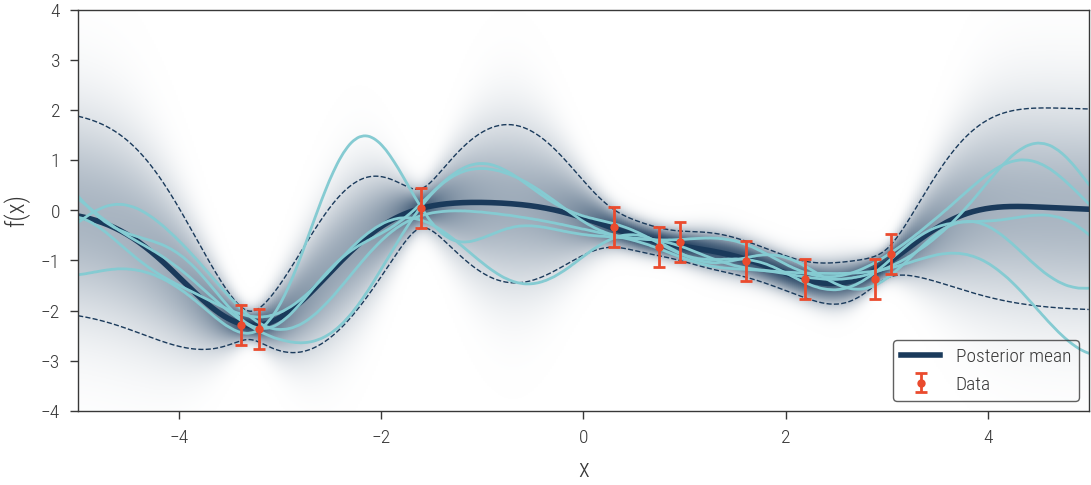

In [160]:
# here's a plot for the slide template:
plt.rcParams.update(bundles.beamer_tueai())
fig, ax = plt.subplots() # note: no "figsize" here!
make_plot(ax)
plt.savefig("tueplots_example_beamer_tueai.pdf")


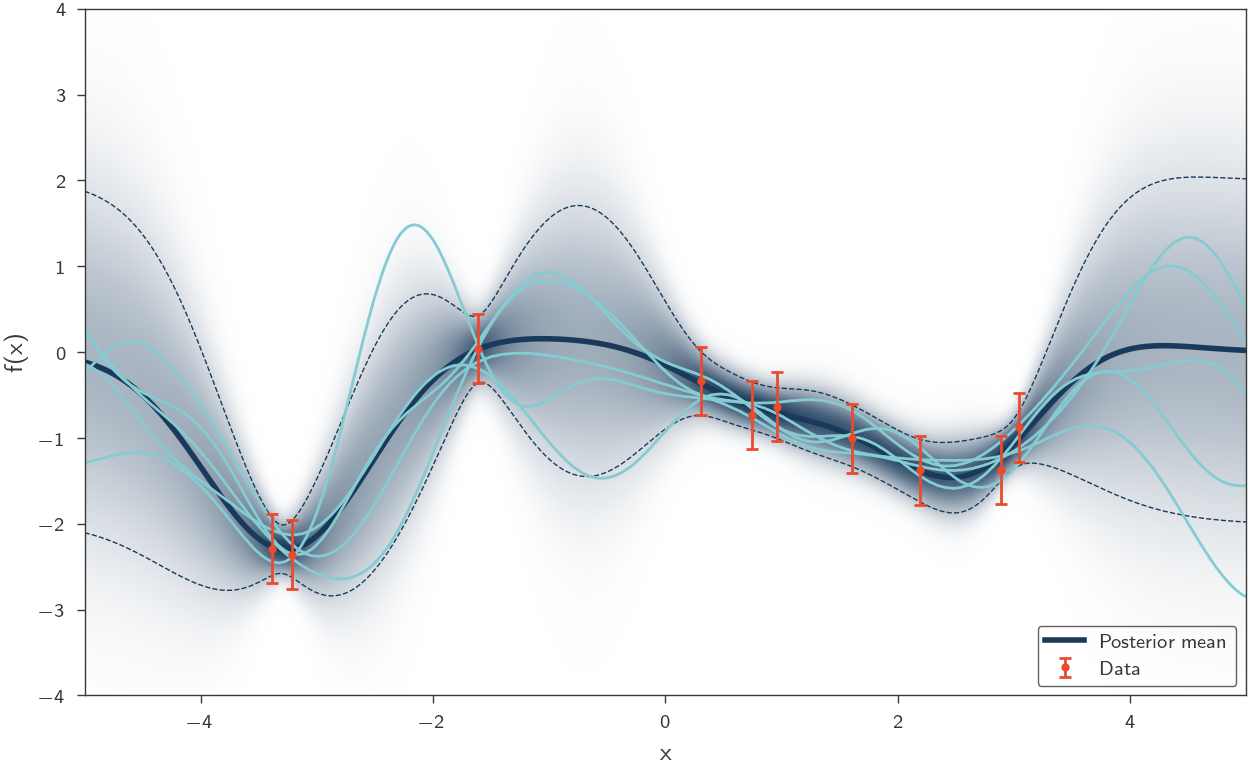

In [161]:
# and the same plot for the thesis:
plt.rcParams.update(bundles.tue_ai_thesis())
fig, ax = plt.subplots() # note: no "figsize" here!
make_plot(ax)
plt.savefig("tueplots_example_tue_ai_thesis.pdf")